# Iris数据集实验
实验内容：比较七种模型(CART、AdaBoost、GBDT、Random Forest、Extra Tree、XGBoost、LightGBM)在Iris数据集上的表现及耗时。

实验环境：Win10、Python3.6

主要库版本：
- numpy 1.18.2
- pandas 1.1.3
- scikit-learn 0.23.2
- xgboost 1.2.1
- lightgbm 3.0.0.99


In [1]:
# import
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from matplotlib import pyplot

import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
validation_size = 0.2 # 20%用于test
dataset = datasets.load_iris()
X = dataset.data
Y = dataset.target
seed = 12 # 随机数的种子，后边每次对算法进行评估前都会重新设置随机数的种子，
         # 确保每次对算法评估都使用相同数据集
# X_train，Y_train用于train，X_validation和Y_validation用于test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [3]:
# 算法审查
models = {}
models['CART'] = DecisionTreeClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['GBDT'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier() 
models['ETC'] = ExtraTreesClassifier()
models['XGBoost'] = XGBClassifier()
models['LightGBM'] = LGBMClassifier()

In [4]:
models # 打印模型参数

{'CART': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 'GBDT': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                          

In [5]:
results = []
timeResults = []
# k折交叉验证
for key in models:
    kfold = KFold(n_splits=10, random_state=seed)
    start = time.time() # 记录开始时间
    cv_results = cross_val_score(models[key], X_train, Y_train, cv = kfold, scoring='accuracy')
    end = time.time() # 记录结束时间
    results.append(cv_results)
    print('-'*40)
    print('%s: %f(%f)' %(key, cv_results.mean(), cv_results.std()))
    print('Running time: %f Seconds'%(end-start))
    timeResults.append((end-start))

----------------------------------------
CART: 0.941667(0.053359)
Running time: 0.016000 Seconds
----------------------------------------
AdaBoost: 0.925000(0.058333)
Running time: 0.797844 Seconds
----------------------------------------
GBDT: 0.933333(0.050000)
Running time: 1.700331 Seconds
----------------------------------------
RF: 0.941667(0.053359)
Running time: 1.515951 Seconds
----------------------------------------
ETC: 0.958333(0.041667)
Running time: 1.025843 Seconds
----------------------------------------
XGBoost: 0.950000(0.055277)
Running time: 1.349020 Seconds
----------------------------------------
LightGBM: 0.958333(0.041667)
Running time: 0.276999 Seconds


In [6]:
results #每行表示对应模型的K折交叉验证的准确率

[array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 0.83333333]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 0.91666667]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]),
 array([1.        , 1.        , 0.91666667, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 1.        ]),
 array([1.        , 0.91666667, 0.91666667, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 1.        ])]

In [7]:
timeResults

[0.015999555587768555,
 0.7978436946868896,
 1.7003309726715088,
 1.5159509181976318,
 1.0258429050445557,
 1.3490197658538818,
 0.27699947357177734]

In [8]:
cv_results

array([1.        , 0.91666667, 0.91666667, 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 0.91666667, 1.        ])

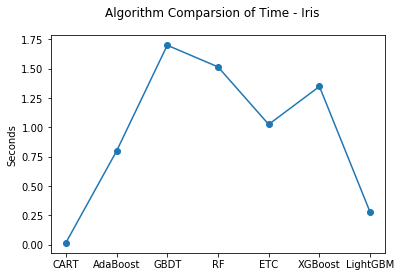

In [9]:
# 折线图比较算法执行时间
fig = pyplot.figure()
fig.suptitle('Algorithm Comparsion of Time - Iris')
ax = fig.add_subplot(111)
x = range(len(models.keys()))
pyplot.plot(x, timeResults, 'o-')
pyplot.xticks(x, models.keys())
pyplot.ylabel('Seconds')
pyplot.savefig('./Algorithm Comparsion of Time - Iris.png') # 保存图片
pyplot.show()

In [10]:
results

[array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 0.83333333]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 0.91666667, 1.        , 0.91666667, 0.91666667]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]),
 array([1.        , 1.        , 0.91666667, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]),
 array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 1.        ]),
 array([1.        , 0.91666667, 0.91666667, 0.91666667, 1.        ,
        0.91666667, 1.        , 1.        , 0.91666667, 1.        ])]

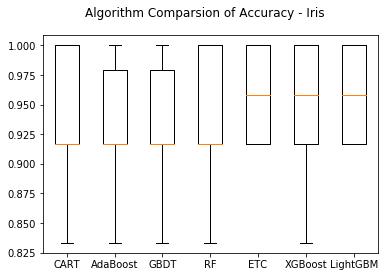

In [11]:
# 箱线图比较算法准确率
fig = pyplot.figure()
fig.suptitle('Algorithm Comparsion of Accuracy - Iris')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.savefig('./Algorithm Comparsion of Accuracy - Iris.png') # 保存图片
pyplot.show()